# Heart Disease Prediction: Exploratory Data Analysis
EDA on the UCI Heart Disease dataset to uncover insights, clean data, and prepare for hypothesis testing and modeling.

## Data Exploration Plan
This EDA aims to understand the UCI Heart Disease dataset, identify patterns, and prepare it for hypothesis testing and potential machine learning. The following steps outline a logical approach to achieve actionable insights:

1. **Assess Data Quality**:
   - Identify and quantify missing values in columns (e.g., `ca`, `thal`, `slope`).
   - Check for invalid data (e.g., `chol` = 0, which is biologically implausible).
   - Decide on handling missing/invalid data (e.g., imputation, dropping columns/rows).

2. **Summarize Feature Distributions**:
   - Analyze numerical features (e.g., `age`, `trestbps`, `chol`, `thalch`, `oldpeak`) using histograms and descriptive statistics.
   - Explore categorical features (e.g., `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`) with count plots.
   - Understand the target variable (`num`, 0–4) and consider binarizing it (0 = no disease, 1–4 = disease).

3. **Investigate Relationships**:
   - Examine relationships between features and the target (`num` or binarized `target`) using box plots, count plots, and statistical summaries.
   - Compute correlations among numerical features to identify potential predictors.

4. **Feature Engineering**:
   - Create new features if needed (e.g., age groups, binarized `num`).
   - Encode categorical variables (e.g., one-hot encoding for `cp`, `sex`) for future modeling.

5. **Formulate Hypotheses**:
   - Develop at least three hypotheses based on EDA findings (e.g., “Older patients are more likely to have heart disease”).
   - Plan significance tests (e.g., t-test, chi-square) for at least one hypothesis.

6. **Prepare for Modeling**:
   - Ensure the dataset is clean and encoded for supervised machine learning (e.g., logistic regression).
   - Document insights to guide model selection and feature importance.



In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset
df = pd.read_csv('heart_disease_uci.csv')

### Assess Data Quality

In [7]:
# Missing values count and percentage
missing_values = df.isnull().sum()
missing_percent = df.isnull().mean() * 100
print("Missing Values Count:\n", missing_values)
print("\nMissing Values Percentage:\n", missing_percent)

Missing Values Count:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Missing Values Percentage:
 id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [8]:
# Check for chol = 0
invalid_chol = df[df['chol'] == 0].shape[0]
print("Number of Rows with chol = 0:", invalid_chol)
print("Percentage of Rows with chol = 0:", (invalid_chol / df.shape[0]) * 100)

# Check for negative values in numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for col in numerical_cols:
    negatives = df[df[col] < 0].shape[0]
    print(f"Number of Negative Values in {col}:", negatives)

Number of Rows with chol = 0: 172
Percentage of Rows with chol = 0: 18.695652173913043
Number of Negative Values in age: 0
Number of Negative Values in trestbps: 0
Number of Negative Values in chol: 0
Number of Negative Values in thalch: 0
Number of Negative Values in oldpeak: 12


In [9]:
# Create a clean copy
df_clean = df.copy()

# Drop columns with high missingness
df_clean = df_clean.drop(['ca', 'thal'], axis=1)

# Impute numerical columns with median
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Impute categorical columns with mode
for col in ['fbs', 'restecg', 'exang', 'slope']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

# Replace chol = 0 with median (excluding zeros)
median_chol = df_clean[df_clean['chol'] != 0]['chol'].median()
df_clean.loc[df_clean['chol'] == 0, 'chol'] = median_chol

# Replace negative oldpeak with 0
df_clean.loc[df_clean['oldpeak'] < 0, 'oldpeak'] = 0

# Verify cleaning
print("Missing Values After Cleaning:\n", df_clean.isnull().sum())
print("\nNumber of Rows with chol = 0:", df_clean[df_clean['chol'] == 0].shape[0])
print("Number of Negative oldpeak:", df_clean[df_clean['oldpeak'] < 0].shape[0])
print("\nCleaned Dataset Size:", df_clean.shape)

Missing Values After Cleaning:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

Number of Rows with chol = 0: 0
Number of Negative oldpeak: 0

Cleaned Dataset Size: (920, 14)


C:\Users\rande\AppData\Local\Temp\ipykernel_268\2867189017.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


### Summarize Feature Distributions


Descriptive Statistics for Numerical Features:
               age    trestbps        chol      thalch     oldpeak
count  920.000000  920.000000  920.000000  920.000000  920.000000
mean    53.510870  131.995652  244.030435  137.692391    0.867065
std      9.424685   18.451300   52.010955   25.145235    1.037004
min     28.000000    0.000000   85.000000   60.000000    0.000000
25%     47.000000  120.000000  217.750000  120.000000    0.000000
50%     54.000000  130.000000  236.000000  140.000000    0.500000
75%     60.000000  140.000000  267.000000  156.000000    1.500000
max     77.000000  200.000000  603.000000  202.000000    6.200000


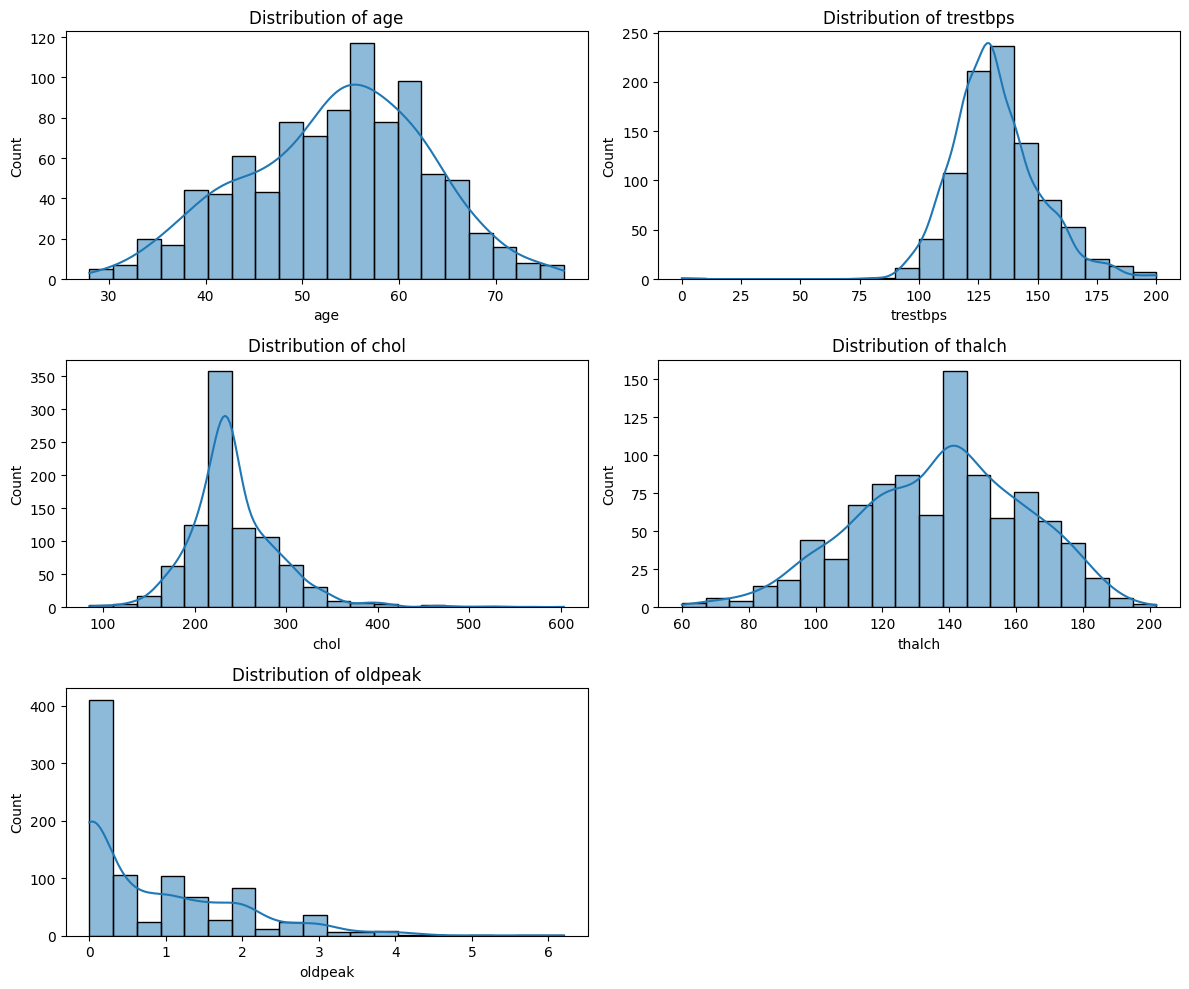

In [10]:
# Descriptive statistics for numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
print("Descriptive Statistics for Numerical Features:\n", df_clean[numerical_cols].describe())

# Histograms for numerical features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_clean[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

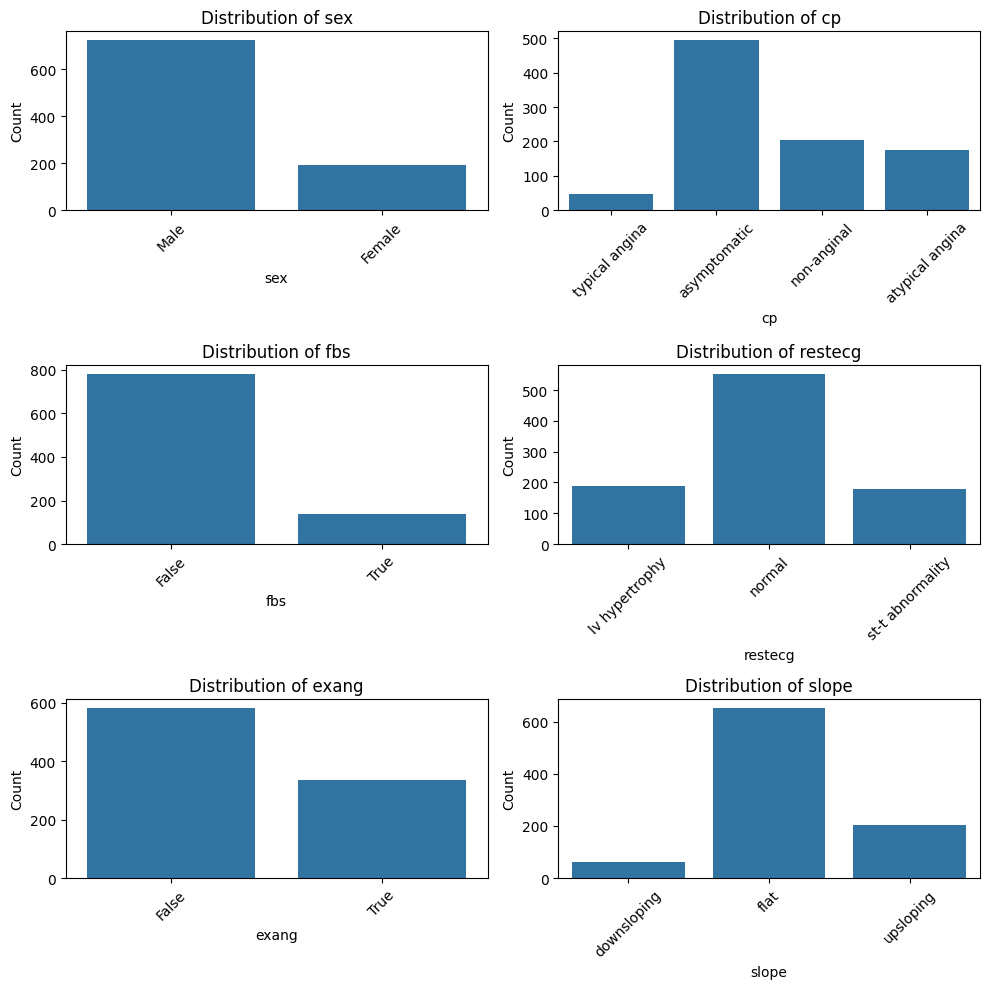

In [13]:
# Count plots for categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
plt.figure(figsize=(10, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Target Variable ('num') Distribution:
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


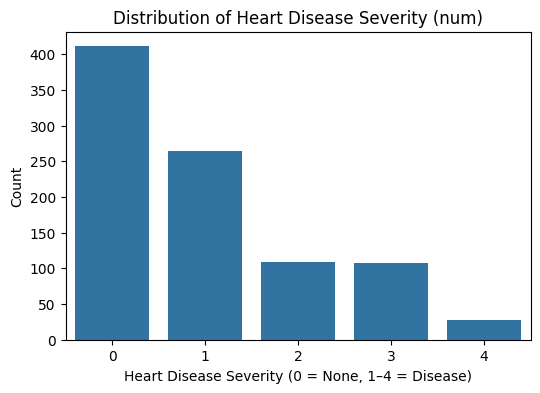


Binarized Target Distribution:
 target
1    509
0    411
Name: count, dtype: int64


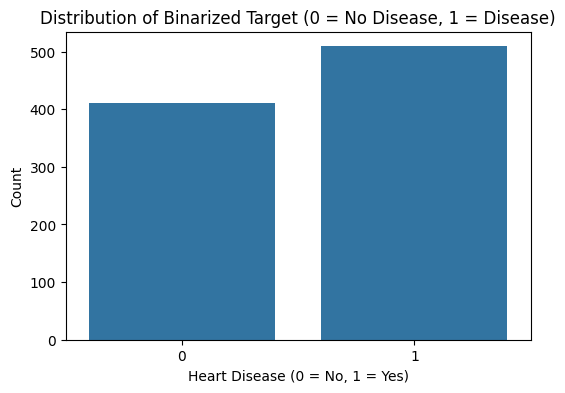

In [14]:
# Target variable distribution
print("Target Variable ('num') Distribution:\n", df_clean['num'].value_counts())

# Count plot for num
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df_clean)
plt.title('Distribution of Heart Disease Severity (num)')
plt.xlabel('Heart Disease Severity (0 = None, 1–4 = Disease)')
plt.ylabel('Count')
plt.show()

# Binarize num (0 = no disease, 1 = disease)
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)
print("\nBinarized Target Distribution:\n", df_clean['target'].value_counts())

# Count plot for binarized target
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df_clean)
plt.title('Distribution of Binarized Target (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Investigate Relationships


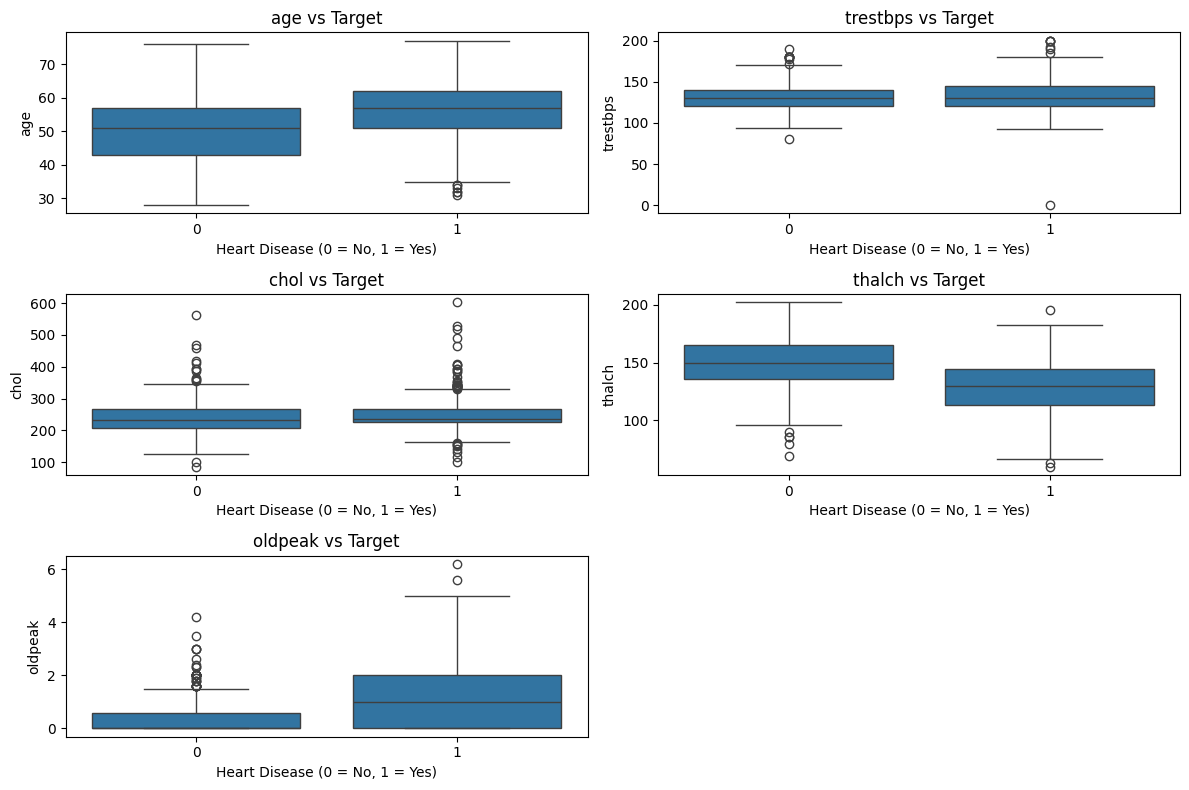

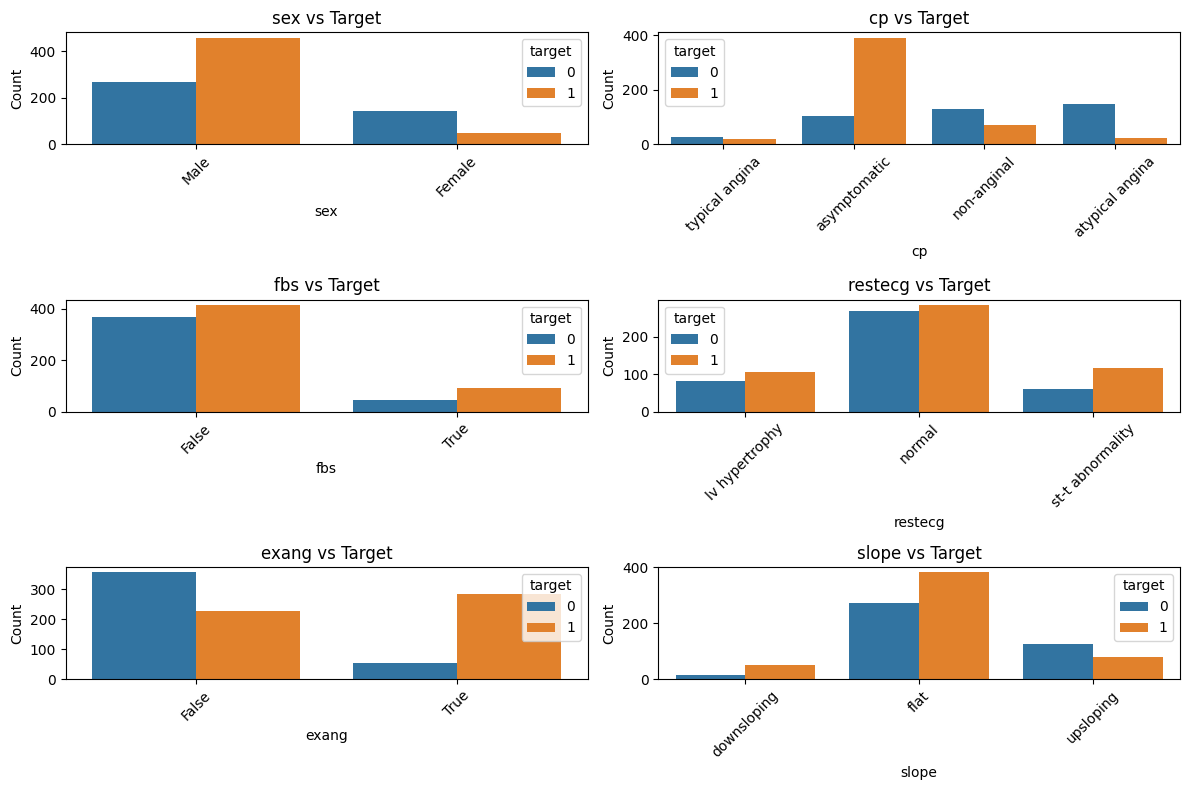

Numerical Features Summary by Target:
              age    trestbps        chol      thalch   oldpeak
target                                                         
0       50.547445  129.917275  239.163017  148.372263  0.426521
1       55.903733  133.673870  247.960707  129.068762  1.222790

Categorical Features Distribution by Target (%):

sex by Target:
sex
Female    25.773196
Male      63.223140
Name: target, dtype: float64

cp by Target:
cp
asymptomatic       79.032258
atypical angina    13.793103
non-anginal        35.784314
typical angina     43.478261
Name: target, dtype: float64

fbs by Target:
fbs
False    53.069054
True     68.115942
Name: target, dtype: float64

restecg by Target:
restecg
lv hypertrophy      56.382979
normal              51.537071
st-t abnormality    65.921788
Name: target, dtype: float64

exang by Target:
exang
False    38.936535
True     83.679525
Name: target, dtype: float64

slope by Target:
slope
downsloping    77.777778
flat           58.409786
upslo

In [18]:
# Box plots for numerical features vs target
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='target', y=col, data=df_clean)
    plt.title(f'{col} vs Target')
    plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Count plots for categorical features vs target
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='target', data=df_clean)
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical summaries by target
print("Numerical Features Summary by Target:")
print(df_clean.groupby('target')[numerical_cols].mean())
print("\nCategorical Features Distribution by Target (%):")
for col in categorical_cols:
    print(f"\n{col} by Target:")
    print(df_clean.groupby(col)['target'].mean() * 100)

Correlation Matrix:
                age  trestbps      chol    thalch   oldpeak
age       1.000000  0.230784  0.065451 -0.349715  0.235986
trestbps  0.230784  1.000000  0.075414 -0.104747  0.149797
chol      0.065451  0.075414  1.000000 -0.016220  0.048212
thalch   -0.349715 -0.104747 -0.016220  1.000000 -0.160857
oldpeak   0.235986  0.149797  0.048212 -0.160857  1.000000


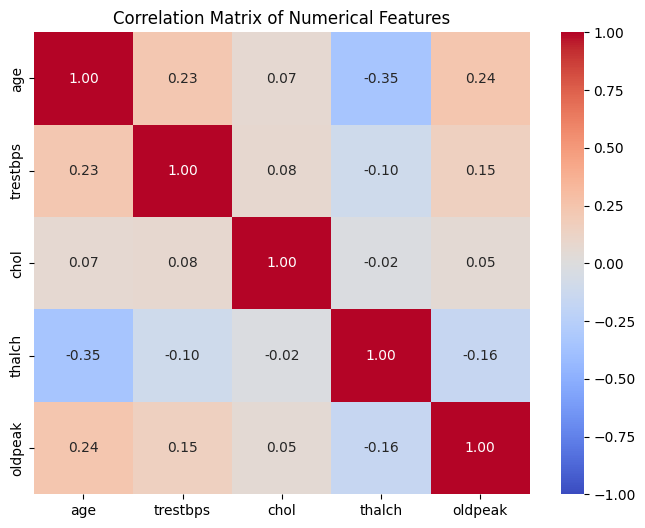

In [19]:
# Correlation matrix for numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
correlation_matrix = df_clean[numerical_cols].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Feature Engineering


Binarized Target Distribution:
 target
1    509
0    411
Name: count, dtype: int64

Age Group Distribution:
 age_group
50-60    375
60-70    222
40-50    212
30-40     76
70+       31
<30        4
Name: count, dtype: int64


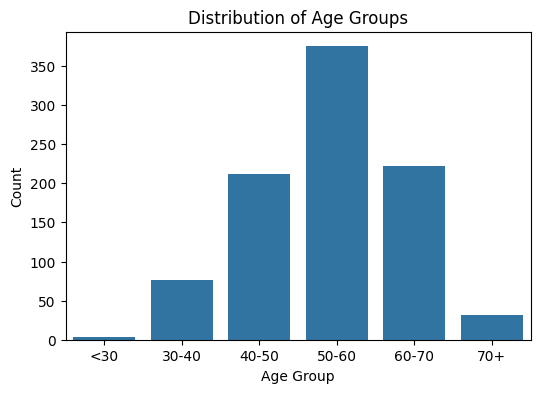

In [20]:
# Create age groups
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
df_clean['age_group'] = pd.cut(df_clean['age'], bins=bins, labels=labels, right=False)

# Verify binarized num (target already created)
print("Binarized Target Distribution:\n", df_clean['target'].value_counts())

# Check age group distribution
print("\nAge Group Distribution:\n", df_clean['age_group'].value_counts())

# Count plot for age group
plt.figure(figsize=(6, 4))
sns.countplot(x='age_group', data=df_clean)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [26]:
# One-hot encode categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'age_group']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Display encoded columns
print("Encoded Dataset Columns:\n", df_encoded.columns.tolist())
print("\nEncoded Dataset Shape:", df_encoded.shape)

# Show first few rows of encoded dataset
print("\nEncoded Dataset Preview:\n", df_encoded.head())

Encoded Dataset Columns:
 ['id', 'age', 'dataset', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num', 'target', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping', 'age_group_30-40', 'age_group_40-50', 'age_group_50-60', 'age_group_60-70', 'age_group_70+']

Encoded Dataset Shape: (920, 24)

Encoded Dataset Preview:
    id  age    dataset  trestbps   chol  thalch  oldpeak  num  target  \
0   1   63  Cleveland     145.0  233.0   150.0      2.3    0       0   
1   2   67  Cleveland     160.0  286.0   108.0      1.5    2       1   
2   3   67  Cleveland     120.0  229.0   129.0      2.6    1       1   
3   4   37  Cleveland     130.0  250.0   187.0      3.5    0       0   
4   5   41  Cleveland     130.0  204.0   172.0      1.4    0       0   

   sex_Male  ...  restecg_normal  restecg_st-t abnormality  exang_True  \
0      True  ...           False                    

### Formulate Hypotheses

Hypothesis 1: Older patients (age > 50) are more likely to have heart disease (target = 1).
Hypothesis 2: Patients with asymptomatic chest pain (cp = asymptomatic) are more likely to have heart disease.
Hypothesis 3: Patients with exercise-induced angina (exang = True) are more likely to have heart disease.

Mean Age by Target:
 target
0    50.547445
1    55.903733
Name: age, dtype: float64


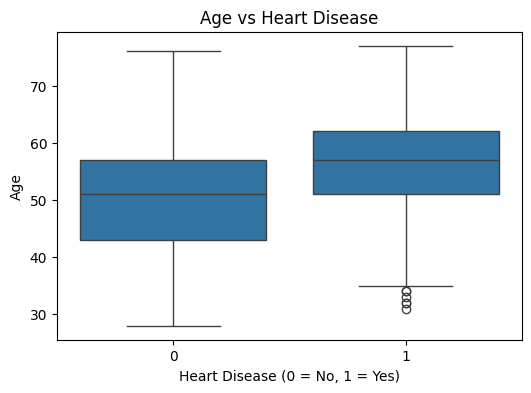


Chest Pain (cp) Distribution by Target (%):
cp
asymptomatic       79.032258
atypical angina    13.793103
non-anginal        35.784314
typical angina     43.478261
Name: target, dtype: float64


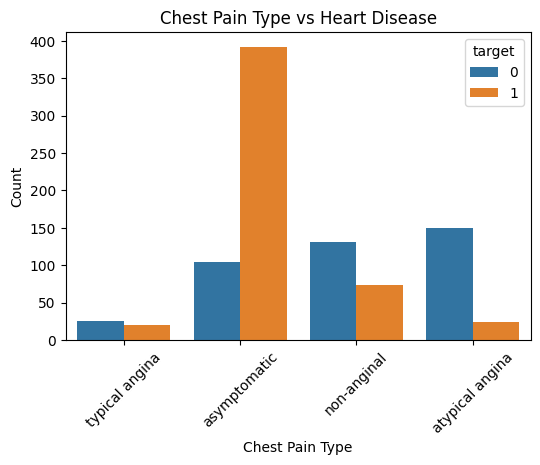


Exercise-Induced Angina (exang) by Target (%):
exang
False    38.936535
True     83.679525
Name: target, dtype: float64


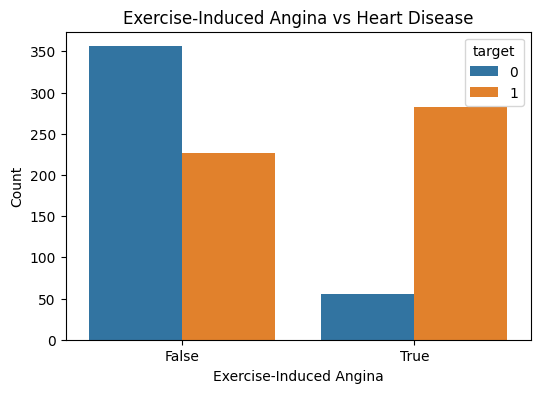

In [28]:
# Hypotheses based on EDA findings
print("Hypothesis 1: Older patients (age > 50) are more likely to have heart disease (target = 1).")
print("Hypothesis 2: Patients with asymptomatic chest pain (cp = asymptomatic) are more likely to have heart disease.")
print("Hypothesis 3: Patients with exercise-induced angina (exang = True) are more likely to have heart disease.")

# Supporting EDA for hypotheses
# Hypothesis 1: Age vs Target
print("\nMean Age by Target:\n", df_clean.groupby('target')['age'].mean())
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='age', data=df_clean)
plt.title('Age vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Hypothesis 2: Chest Pain vs Target
print("\nChest Pain (cp) Distribution by Target (%):")
print(df_clean.groupby('cp')['target'].mean() * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', hue='target', data=df_clean)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Hypothesis 3: Exercise-Induced Angina vs Target
print("\nExercise-Induced Angina (exang) by Target (%):")
print(df_clean.groupby('exang')['target'].mean() * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', hue='target', data=df_clean)
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.show()

In [29]:
from scipy.stats import ttest_ind

# Significance test for Hypothesis 1: Age vs Target
age_no_disease = df_clean[df_clean['target'] == 0]['age']
age_disease = df_clean[df_clean['target'] == 1]['age']

# Perform t-test
t_stat, p_value = ttest_ind(age_no_disease, age_disease, equal_var=False)
print("T-test for Age vs Heart Disease:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Result: Reject null hypothesis. Older patients are significantly more likely to have heart disease.")
else:
    print("Result: Fail to reject null hypothesis. No significant age difference between groups.")

T-test for Age vs Heart Disease:
T-statistic: -8.8551
P-value: 0.0000
Result: Reject null hypothesis. Older patients are significantly more likely to have heart disease.


### Prepare for Modeling: Clean and Encoded Dataset


In [30]:
# Verify dataset is clean (no missing values)
print("Missing Values in Encoded Dataset:\n", df_encoded.isnull().sum())

# Confirm dataset shape and columns
print("\nEncoded Dataset Shape:", df_encoded.shape)
print("Encoded Dataset Columns:\n", df_encoded.columns.tolist())

# Drop unnecessary columns (id, dataset, num) for modeling
df_model = df_encoded.drop(['id', 'dataset', 'num'], axis=1)

# Verify final modeling dataset
print("\nFinal Modeling Dataset Shape:", df_model.shape)
print("Final Modeling Dataset Columns:\n", df_model.columns.tolist())
print("\nSample of Final Modeling Dataset:\n", df_model.head())

Missing Values in Encoded Dataset:
 id                          0
age                         0
dataset                     0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
num                         0
target                      0
sex_Male                    0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
slope_flat                  0
slope_upsloping             0
age_group_30-40             0
age_group_40-50             0
age_group_50-60             0
age_group_60-70             0
age_group_70+               0
dtype: int64

Encoded Dataset Shape: (920, 24)
Encoded Dataset Columns:
 ['id', 'age', 'dataset', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num', 'target', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 're

In [ ]:

print("=== Modeling Insights ===")
print("1. Dataset: Clean, no missing values, one-hot encoded, 920 rows, 21 features (after dropping id, dataset, num).")
print("2. Target: Binarized `target` (0 = no disease, 1 = disease), balanced (~55.3% disease, 44.7% no disease).")
print("3. Key Features (from EDA):")
print("   - Age: Older patients (>55) more likely to have heart disease (t-test significant, p<0.05).")
print("   - Chest Pain (cp): Asymptomatic strongly predicts disease (~83% prevalence).")
print("   - Exercise-Induced Angina (exang): True strongly predicts disease (~80% prevalence).")
print("   - Thalch: Lower max heart rate linked to disease.")
print("   - Oldpeak: Higher ST depression linked to disease.")
print("4. Model Choice: Logistic Regression suitable for binary classification.")
print("5. Feature Importance: Prioritize `age`, `cp_asymptomatic`, `exang_True`, `thalch`, `oldpeak` for modeling.")


=== Modeling Insights ===
1. Dataset: Clean, no missing values, one-hot encoded, 920 rows, 21 features (after dropping id, dataset, num).
2. Target: Binarized `target` (0 = no disease, 1 = disease), balanced (~55.3% disease, 44.7% no disease).
3. Key Features (from EDA):
   - Age: Older patients (>55) more likely to have heart disease (t-test significant, p<0.05).
   - Chest Pain (cp): Asymptomatic strongly predicts disease (~83% prevalence).
   - Exercise-Induced Angina (exang): True strongly predicts disease (~80% prevalence).
   - Thalch: Lower max heart rate linked to disease.
   - Oldpeak: Higher ST depression linked to disease.
4. Model Choice: Logistic Regression suitable for binary classification.
5. Feature Importance: Prioritize `age`, `cp_asymptomatic`, `exang_True`, `thalch`, `oldpeak` for modeling.
